In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the dataset 
data=pd.read_csv("House_Rent_Dataset.csv")
df=pd.DataFrame(data)
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [6]:
df.duplicated().any()

False

In [7]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [8]:
df.describe(include = object)

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4746,4746,4746,4746,4746,4746,4746,4746
unique,81,480,3,2235,6,3,3,3
top,2022-07-06,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,Contact Owner
freq,311,379,2446,37,972,2251,3444,3216


C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


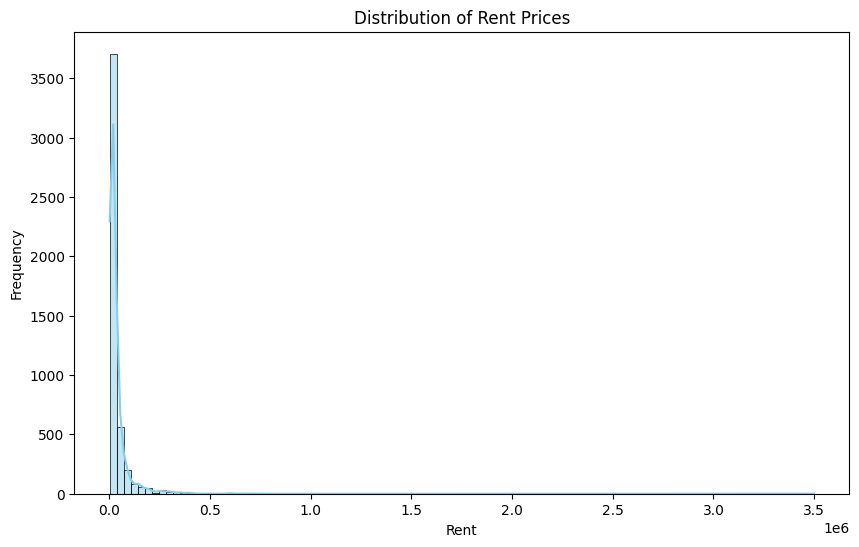

In [9]:
#Distribution of Rent Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Rent'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Rent Prices')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()

C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

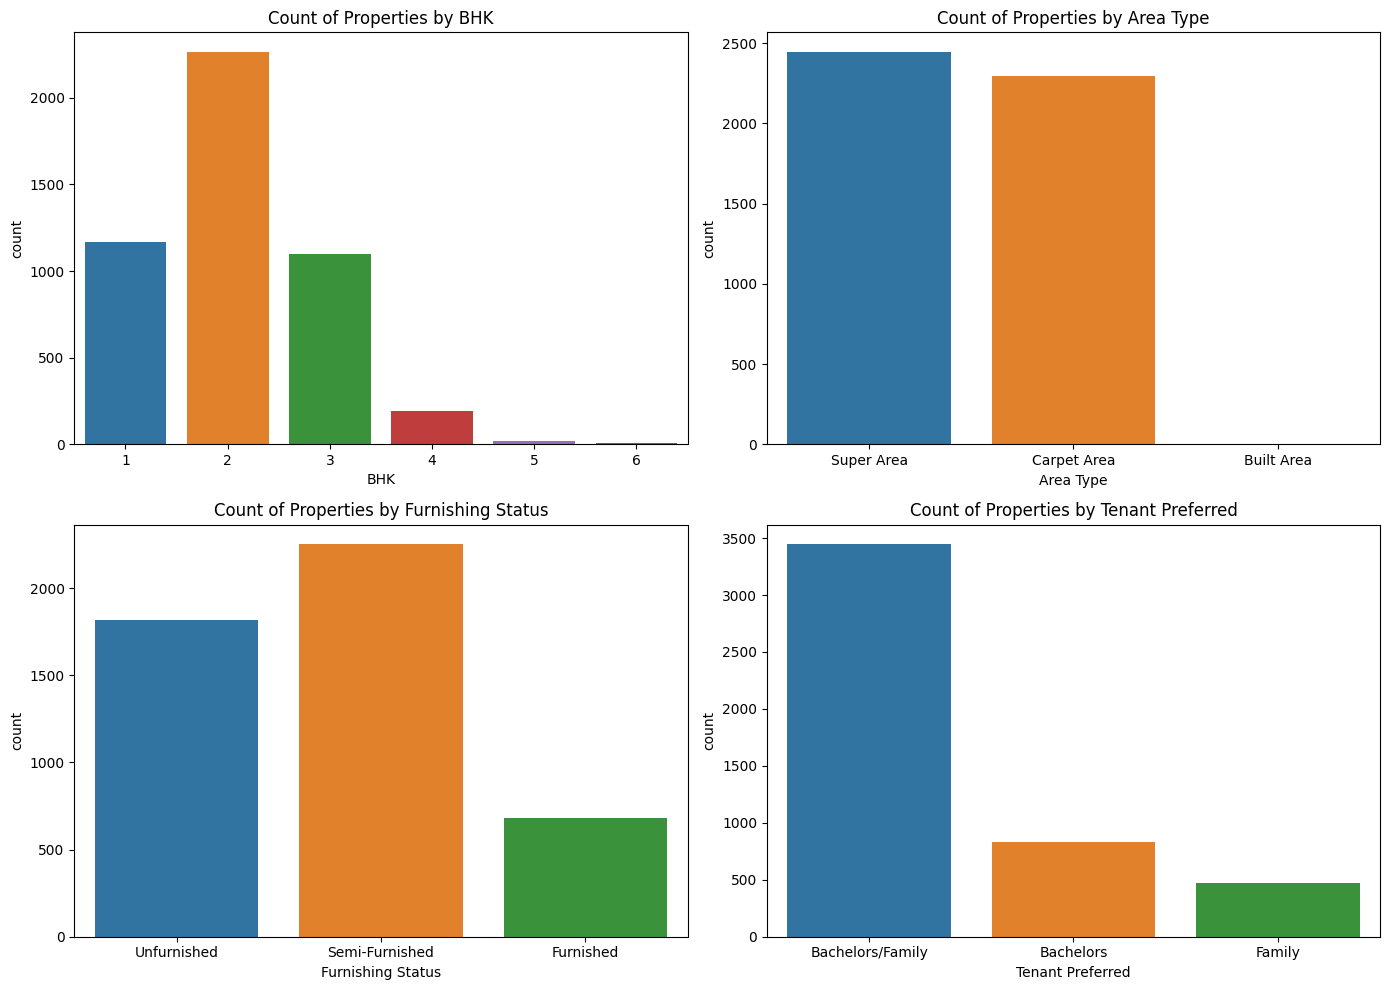

In [10]:
#Count Plots for Categorical Features:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

sns.countplot(x='BHK', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Count of Properties by BHK')

sns.countplot(x='Area Type', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Count of Properties by Area Type')

sns.countplot(x='Furnishing Status', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Count of Properties by Furnishing Status')

sns.countplot(x='Tenant Preferred', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Count of Properties by Tenant Preferred')

plt.tight_layout()
plt.show()

C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


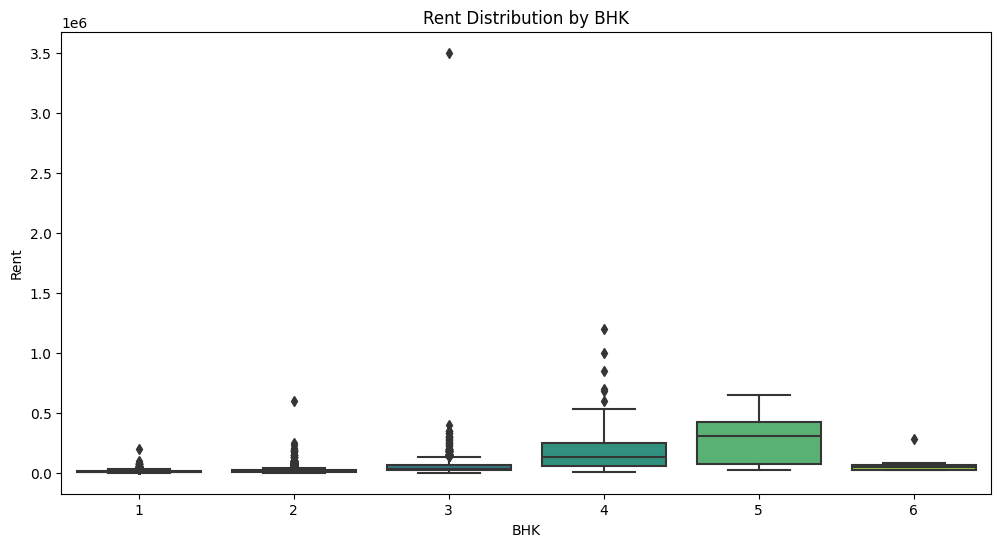

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='BHK', y='Rent', data=df, palette='viridis')
plt.title('Rent Distribution by BHK')
plt.xlabel('BHK')
plt.ylabel('Rent')
plt.show()

C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


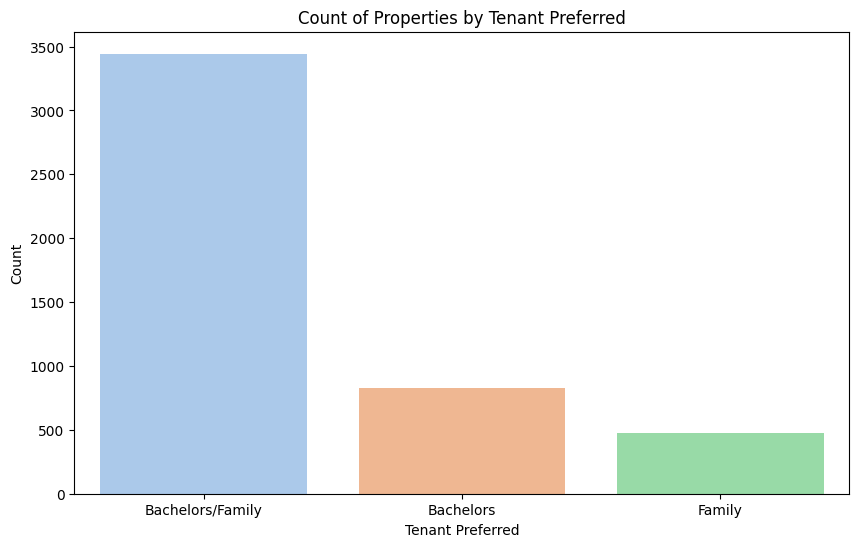

In [12]:
#Count Plot for Tenant Preferred
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenant Preferred', data=df, palette='pastel')
plt.title('Count of Properties by Tenant Preferred')
plt.xlabel('Tenant Preferred')
plt.ylabel('Count')
plt.show()

C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


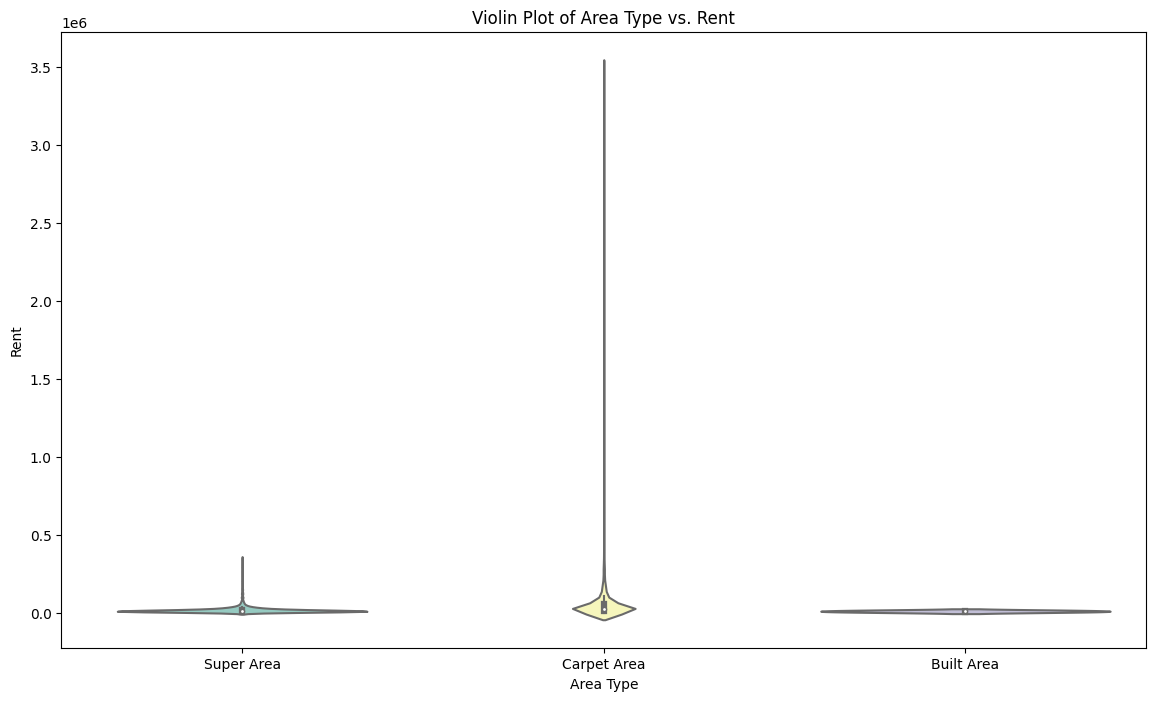

In [13]:
#Violin Plot for Area Type vs. Rent:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Area Type', y='Rent', data=df, palette='Set3')
plt.title('Violin Plot of Area Type vs. Rent')
plt.xlabel('Area Type')
plt.ylabel('Rent')
plt.show()

C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


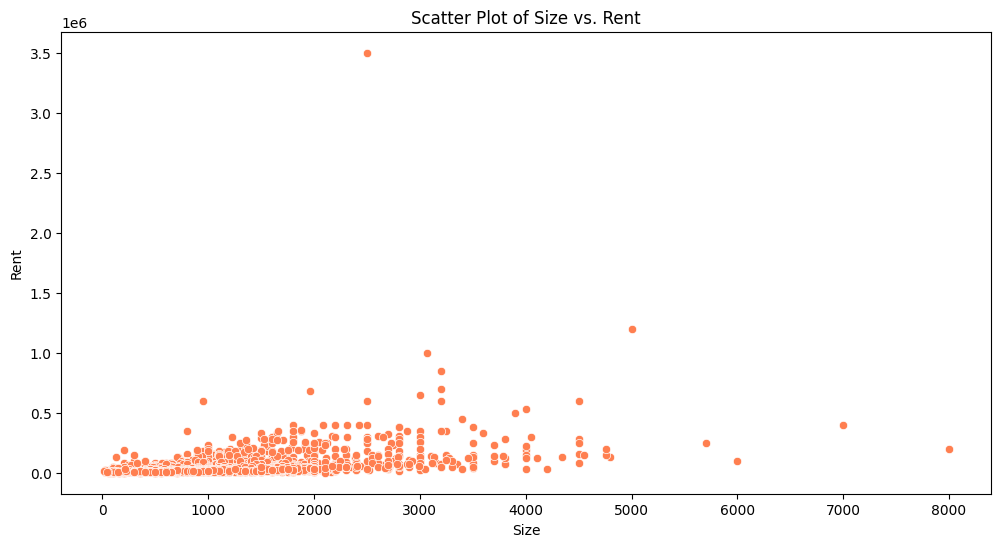

In [14]:
#Scatter Plot for Size vs. Rent:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Size', y='Rent', data=df, color='coral')
plt.title('Scatter Plot of Size vs. Rent')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.show()

In [15]:
#handling Posted on column
df["Posted On"].unique()

array(['2022-05-18', '2022-05-13', '2022-05-16', '2022-07-04',
       '2022-05-09', '2022-04-29', '2022-06-21', '2022-06-07',
       '2022-06-20', '2022-05-23', '2022-05-14', '2022-05-05',
       '2022-06-01', '2022-05-17', '2022-06-09', '2022-07-02',
       '2022-06-14', '2022-06-15', '2022-05-28', '2022-05-22',
       '2022-06-18', '2022-06-25', '2022-06-22', '2022-05-21',
       '2022-06-26', '2022-06-16', '2022-06-29', '2022-05-10',
       '2022-05-12', '2022-06-03', '2022-05-31', '2022-06-10',
       '2022-06-24', '2022-04-30', '2022-05-27', '2022-06-06',
       '2022-05-20', '2022-05-26', '2022-07-03', '2022-04-23',
       '2022-06-19', '2022-07-06', '2022-06-04', '2022-05-30',
       '2022-06-08', '2022-05-03', '2022-05-07', '2022-06-27',
       '2022-05-15', '2022-04-28', '2022-06-28', '2022-06-23',
       '2022-06-13', '2022-05-04', '2022-04-25', '2022-05-06',
       '2022-06-30', '2022-07-01', '2022-06-17', '2022-06-11',
       '2022-05-11', '2022-06-12', '2022-06-05', '2022-

In [16]:
df['Posted On'] = pd.to_datetime(df['Posted On'])

In [17]:
df["Year"] = df["Posted On"].dt.year
df["Month"] = df['Posted On'].dt.month

In [18]:
def find_seasons(month_number):
    if month_number in [12,1,2]:
        return 1 
    elif month_number in [3,4,5]:
        return 2 
    elif month_number in [6,7,8]:
        return 3 
    elif month_number in [9,10,11]:
        return 4 

In [19]:
df['Season'] = df['Month'].apply(find_seasons)

In [20]:
df.drop(columns = "Posted On", inplace = True)

In [21]:
df.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Season
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,2
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,2
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,3
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,2


In [22]:
df.sample(3)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Season
2350,2,30000,1100,2 out of 5,Carpet Area,Hsr Layout,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Agent,2022,5,2
2322,2,20000,980,4 out of 12,Carpet Area,Yelahanka,Bangalore,Semi-Furnished,Family,2,Contact Agent,2022,6,3
335,1,8000,300,Ground out of 2,Carpet Area,Salt Lake City Sector 5,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Agent,2022,6,3


In [23]:
#handling floor coulmn
df['Floor'].unique()[:50]

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24'], dtype=object)

In [24]:
def finde_level(sentence):
    sentence = sentence.split(" ")
    try:
        return " ".join(sentence[:2]) if sentence[1] == "Basement" else sentence[0]
    except:
        return sentence[0]

In [25]:
def finde_levels_number(sentence):
    sentence = sentence.split(" ")
    return sentence[-1]  if len(sentence) > 1 else "1"

In [26]:
df["Level"] = df["Floor"].apply(finde_level)

In [27]:
df["Floors numbers"] = df['Floor'].apply(finde_levels_number)

In [28]:
df.drop(columns = 'Floor', inplace = True)

In [29]:
df.sample(3)

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Season,Level,Floors numbers
2758,2,13000,400,Carpet Area,kst chattarpur Apartments,Delhi,Unfurnished,Bachelors,1,Contact Agent,2022,6,3,2,4
3197,1,9000,700,Carpet Area,Sivalingapuram,Chennai,Semi-Furnished,Family,1,Contact Owner,2022,5,2,1,2
2052,2,18000,1200,Super Area,Annapurneshwari Nagar,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner,2022,5,2,3,4


In [30]:
df['Level'].unique()

array(['Ground', '1', '2', '4', '3', '5', '7', '8', 'Upper Basement',
       '11', 'Lower Basement', '6', '14', '43', '13', '18', '17', '9',
       '19', '60', '34', '12', '26', '25', '53', '16', '10', '39', '32',
       '47', '28', '20', '15', '65', '40', '37', '22', '21', '30', '35',
       '33', '44', '41', '46', '27', '45', '48', '50', '24', '23', '29',
       '49', '36', '76'], dtype=object)

In [31]:
df['Level'].replace({"Ground": 0, "Lower Basement": 0, "Upper Basement": 0},inplace = True)

In [32]:
df.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'Year', 'Month', 'Season', 'Level', 'Floors numbers'],
      dtype='object')

In [33]:
df["Level"] = df["Level"].astype(int)
df["Floors numbers"] = df["Floors numbers"].astype(int)

In [34]:
df.drop(columns = ["Year", "Month", "Season"], inplace = True)

In [35]:
df.sample(3)

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Level,Floors numbers
1411,1,6500,422,Carpet Area,Nalasopara West,Mumbai,Semi-Furnished,Family,2,Contact Agent,9,15
1680,3,150000,3250,Carpet Area,Vasanth Nagar,Bangalore,Furnished,Bachelors/Family,4,Contact Agent,2,6
1031,2,180000,1200,Carpet Area,Khar West,Mumbai,Furnished,Bachelors/Family,3,Contact Agent,7,12


C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AVIGHYAT\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

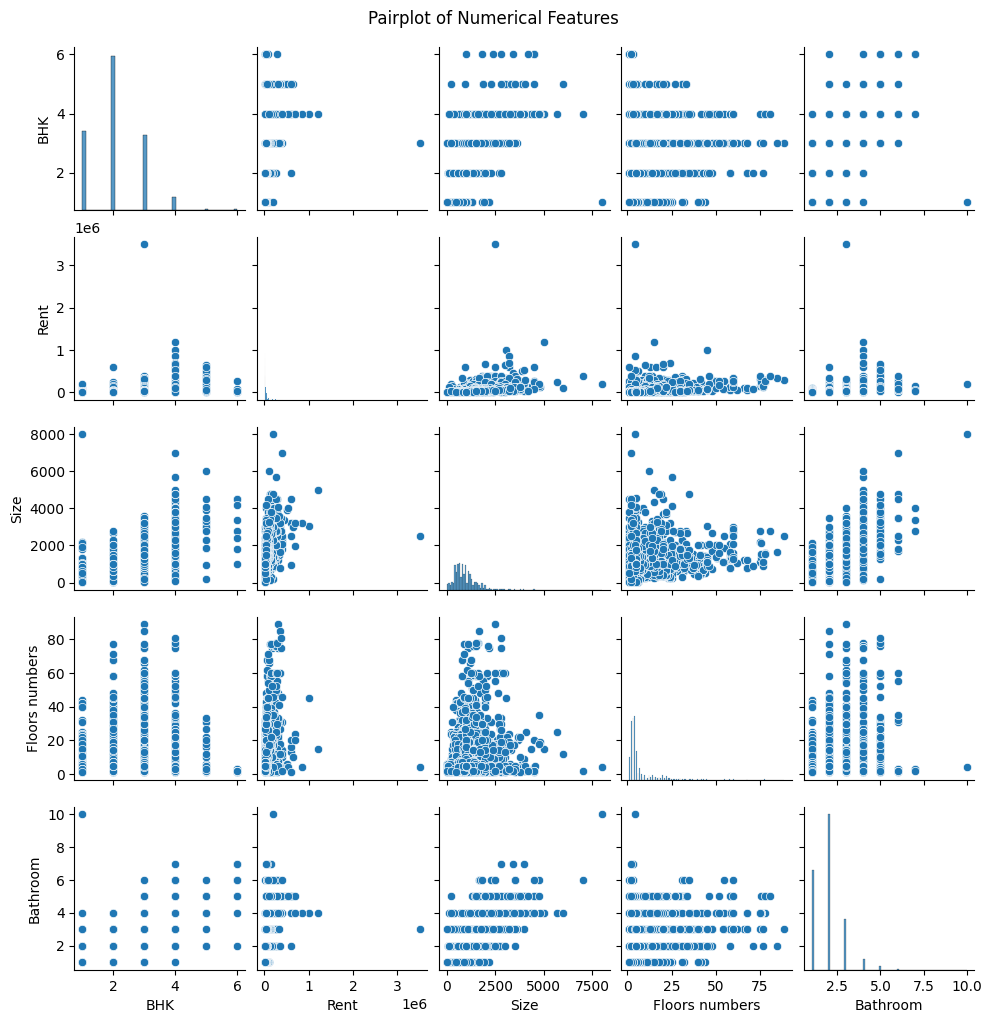

In [36]:
#Pairplot of Numerical Features
sns.pairplot(df[['BHK', 'Rent', 'Size', 'Floors numbers', 'Bathroom']], height=2)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [37]:
encoder = LabelEncoder()

In [38]:
for column in df.select_dtypes(include = object).columns.tolist():
    df[column] = encoder.fit_transform(df[column])

In [39]:
df.sample(3)

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Level,Floors numbers
2272,2,14000,500,2,1845,0,1,1,2,2,0,3
4691,3,20000,1100,2,1394,3,1,1,3,2,2,5
566,2,44000,830,1,1783,5,0,0,2,0,2,2


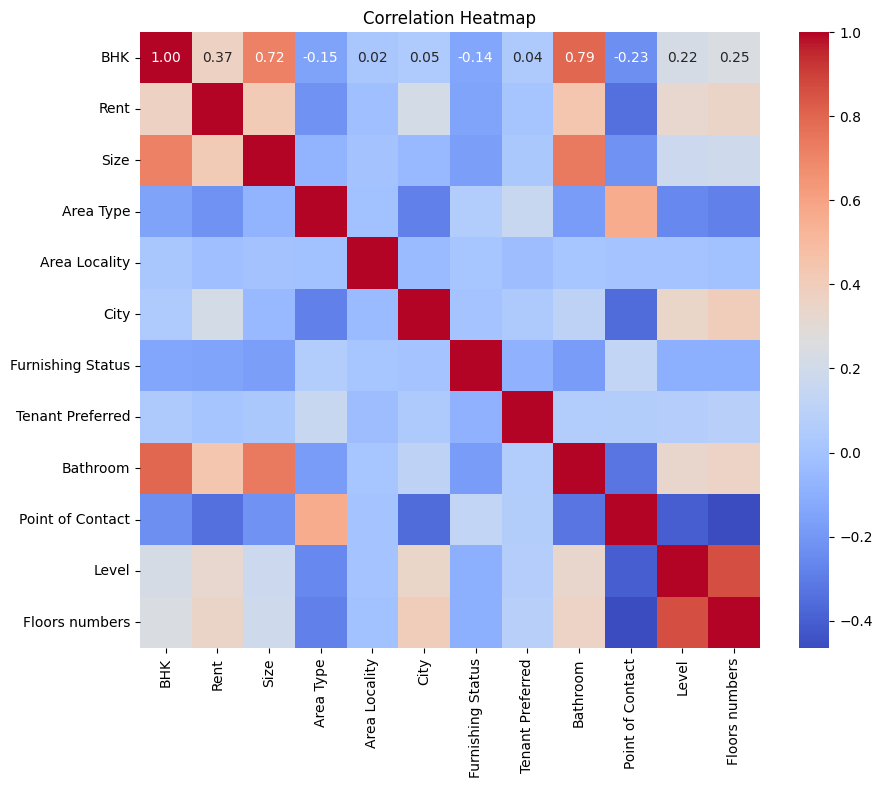

In [40]:
#'Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [41]:
df["Rent"] = np.log10(df["Rent"])
df["Rent"]

0       4.000000
1       4.301030
2       4.230449
3       4.000000
4       3.875061
          ...   
4741    4.176091
4742    4.462398
4743    4.544068
4744    4.653213
4745    4.176091
Name: Rent, Length: 4746, dtype: float64

In [42]:
#Extract the Independent and Dependent Variable
Target = df["Rent"]
training = df.drop(columns = ["Rent"])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(training, Target, test_size = 0.2, random_state = 42)

In [44]:
random_model = RandomForestRegressor(n_estimators=100, max_depth=10)
random_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10)

In [45]:
random_score=random_model.score(X_train, y_train)
random_score

0.9232675127374731

In [46]:
random_predict = random_model.predict(X_test)

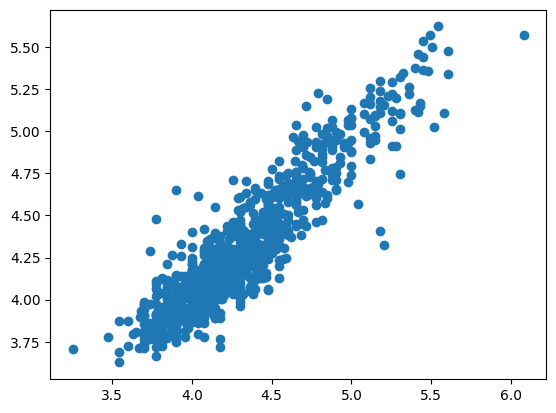

In [47]:
plt.scatter(y_test, random_predict)
plt.show()

In [48]:
#RandomForestRegressor evaluation parameters
random_r2=r2_score(y_test,random_predict)
random_mae=mean_absolute_error(y_test,random_predict)
random_mse = mean_squared_error(y_test, random_predict)
random_rmse = mean_squared_error(y_test, random_predict, squared=False)
print(f"Mean Squared Error (MSE): {random_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {random_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {random_mae:.2f}")
print(f"R-squared (R2): {random_r2:.2f}")

Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.16
Mean Absolute Error (MAE): 0.12
R-squared (R2): 0.84


In [49]:
#Simple Linear Regression:
from sklearn.linear_model import LinearRegression
# Create and train Simple Linear Regression model
simple_lr_model = LinearRegression()
simple_lr_model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Make predictions on the test set
slr_predict = simple_lr_model.predict(X_test)

In [51]:
# SLR performance evaluation parameters
slr_score=simple_lr_model.score(X_train, y_train)
slr_r2=r2_score(y_test,slr_predict)
slr_mae=mean_absolute_error(y_test,slr_predict)
slr_mse = mean_squared_error(y_test, slr_predict)
slr_rmse = mean_squared_error(y_test, slr_predict, squared=False)
print(f"score: {slr_score:.2f}")
print(f"Mean Squared Error (MSE): {slr_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {slr_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {slr_mae:.2f}")
print(f"R-squared (R2): {slr_r2:.2f}")


score: 0.73
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.20
Mean Absolute Error (MAE): 0.15
R-squared (R2): 0.76


In [52]:
#Lasso Regression:
from sklearn.linear_model import Lasso

# Create and train Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the regularization strength (alpha)
lasso_model.fit(X_train, y_train)

Lasso()

In [53]:
# Make predictions on the test set
lasso_predict = lasso_model.predict(X_test)

In [54]:
# Evaluate the model
lasso_score=lasso_model.score(X_train, y_train)
lasso_r2=r2_score(y_test,lasso_predict)
lasso_mae=mean_absolute_error(y_test,lasso_predict)
lasso_mse = mean_squared_error(y_test, lasso_predict)
lasso_rmse = mean_squared_error(y_test, lasso_predict, squared=False)
print(f"score: {lasso_score:.2f}")
print(f"Mean Squared Error (MSE): {lasso_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {lasso_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {lasso_mae:.2f}")
print(f"R-squared (R2): {lasso_r2:.2f}")

score: 0.45
Mean Squared Error (MSE): 0.08
Root Mean Squared Error (RMSE): 0.29
Mean Absolute Error (MAE): 0.23
R-squared (R2): 0.48


In [55]:
#Decision Tree Regression:
from sklearn.tree import DecisionTreeRegressor

# Create and train Decision Tree Regression model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
# Make predictions on the test set
dt_predict = dt_model.predict(X_test)

In [57]:
# Evaluate the model
dt_score=dt_model.score(X_train, y_train)
dt_r2=r2_score(y_test,dt_predict)
dt_mae=mean_absolute_error(y_test,dt_predict)
dt_mse = mean_squared_error(y_test, dt_predict)
dt_rmse = mean_squared_error(y_test, dt_predict, squared=False)
print(f"score: {dt_score:.2f}")
print(f"Mean Squared Error (MSE): {dt_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {dt_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {dt_mae:.2f}")
print(f"R-squared (R2): {dt_r2:.2f}")

score: 1.00
Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.23
Mean Absolute Error (MAE): 0.17
R-squared (R2): 0.68


In [58]:
#Support Vector Regression (SVR):
from sklearn.svm import SVR
# Create and train SVR model
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [60]:
# Make predictions on the scaled test set
svr_predict = svr_model.predict(X_test)

In [61]:
# Evaluate the model
svr_score=svr_model.score(X_train, y_train)
svr_r2=r2_score(y_test,svr_predict)
svr_mae=mean_absolute_error(y_test,svr_predict)
svr_mse = mean_squared_error(y_test, svr_predict)
svr_rmse = mean_squared_error(y_test, svr_predict, squared=False)
print(f"score: {svr_score:.2f}")
print(f"Mean Squared Error (MSE): {svr_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {svr_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {svr_mae:.2f}")
print(f"R-squared (R2): {svr_r2:.2f}")

score: 0.43
Mean Squared Error (MSE): 0.09
Root Mean Squared Error (RMSE): 0.30
Mean Absolute Error (MAE): 0.23
R-squared (R2): 0.46


In [63]:
#Comparitive analysis
model_names = ['RandomForestRegressor', 'LinearRegression', 'Lasso Regression', 'Decision Tree Regression','Support Vector Regression']
r2_scores = [random_r2,slr_r2,lasso_r2,dt_r2,svr_r2]
mae_values = [random_mae,slr_mae,lasso_mae,dt_mae,svr_mae]  
mse_values = [random_mse,slr_mse,lasso_mse,dt_mse,svr_mse]
rmse_values=[random_rmse,slr_rmse,lasso_rmse,dt_rmse,svr_rmse]


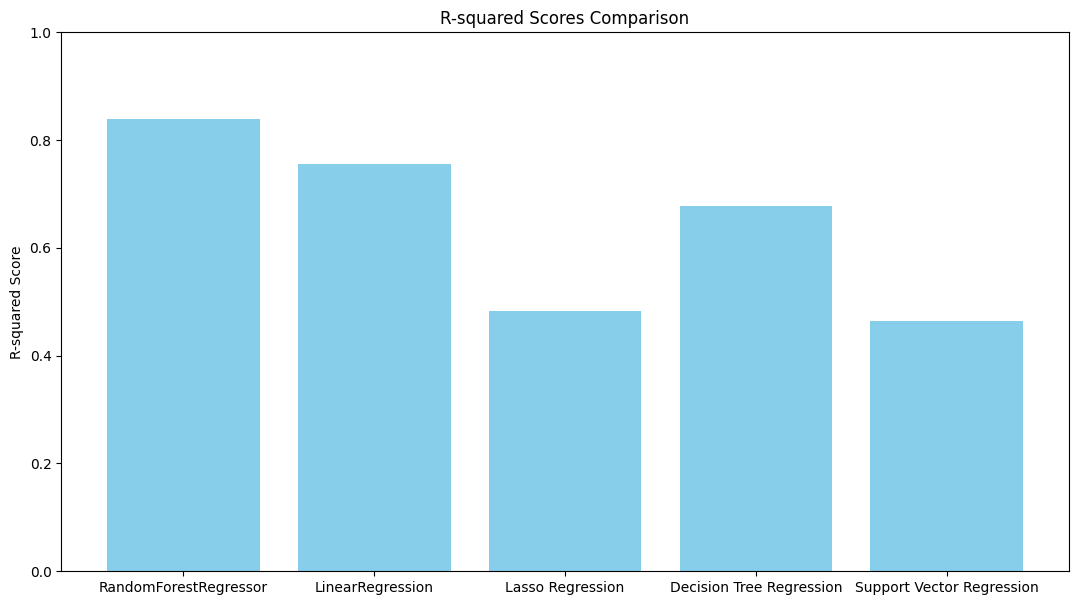

In [67]:
# Bar chart for R-squared scores
plt.figure(figsize=(13, 7))
plt.bar(model_names, r2_scores, color='skyblue')
plt.title('R-squared Scores Comparison')
plt.ylabel('R-squared Score')
plt.ylim(0, 1)  # Adjust the y-axis range if necessary
plt.show()

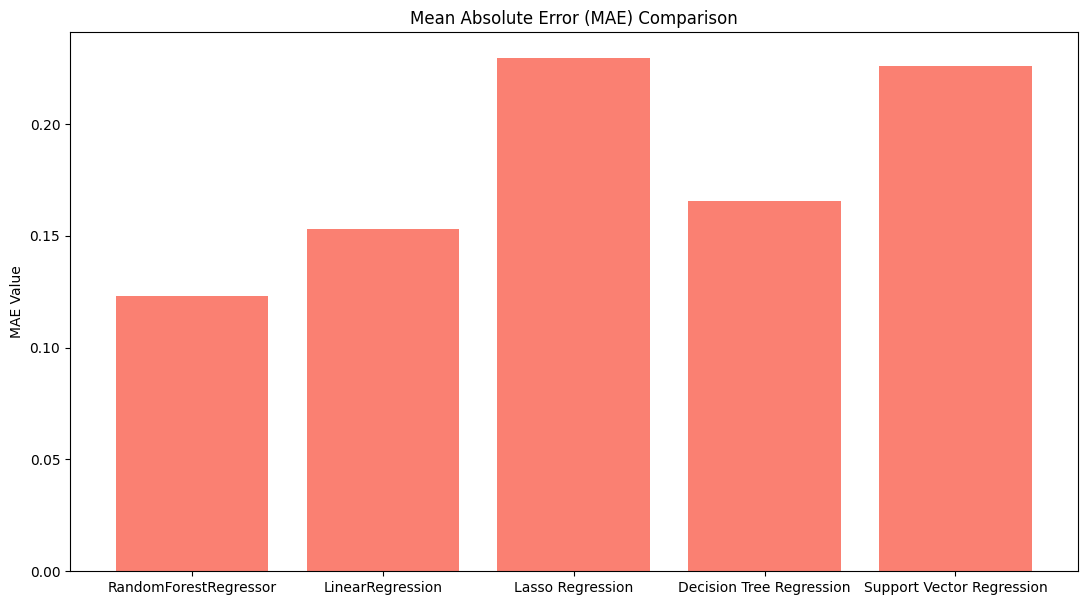

In [68]:
# Bar chart for MAE values
plt.figure(figsize=(13, 7))
plt.bar(model_names, mae_values, color='salmon')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE Value')
plt.show()

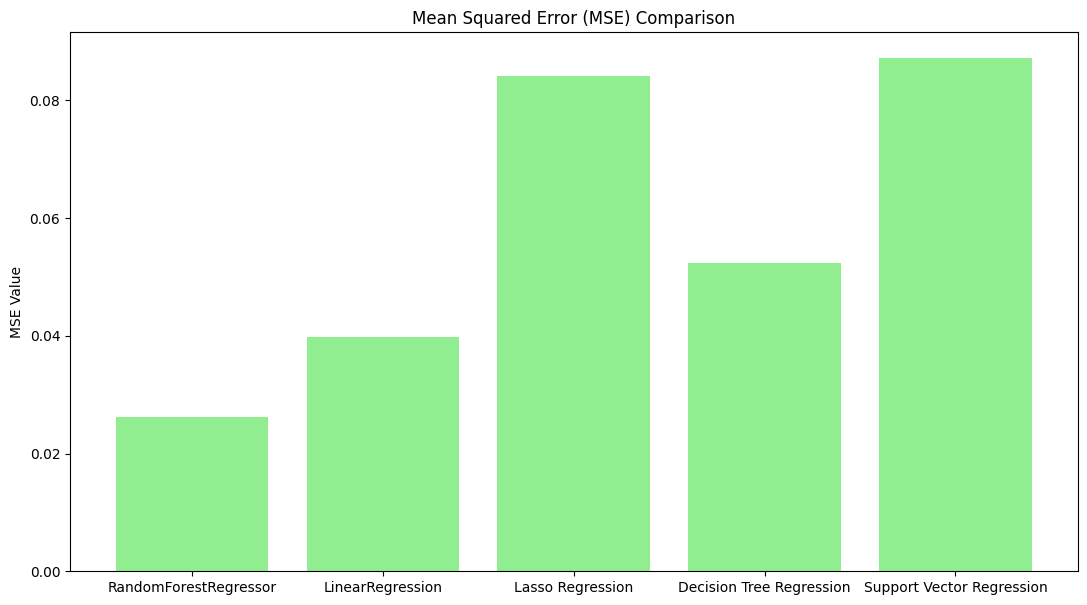

In [69]:
# Bar chart for MSE values
plt.figure(figsize=(13, 7))
plt.bar(model_names, mse_values, color='lightgreen')
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE Value')
plt.show()

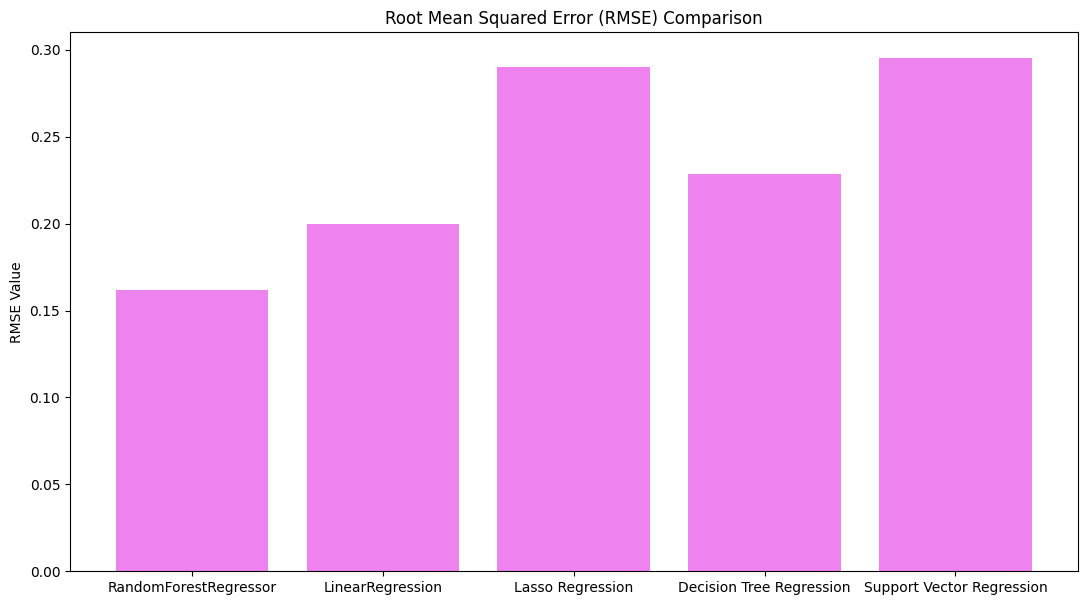

In [70]:
# Bar chart for MSE values
plt.figure(figsize=(13, 7))
plt.bar(model_names, rmse_values, color='violet')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE Value')
plt.show()

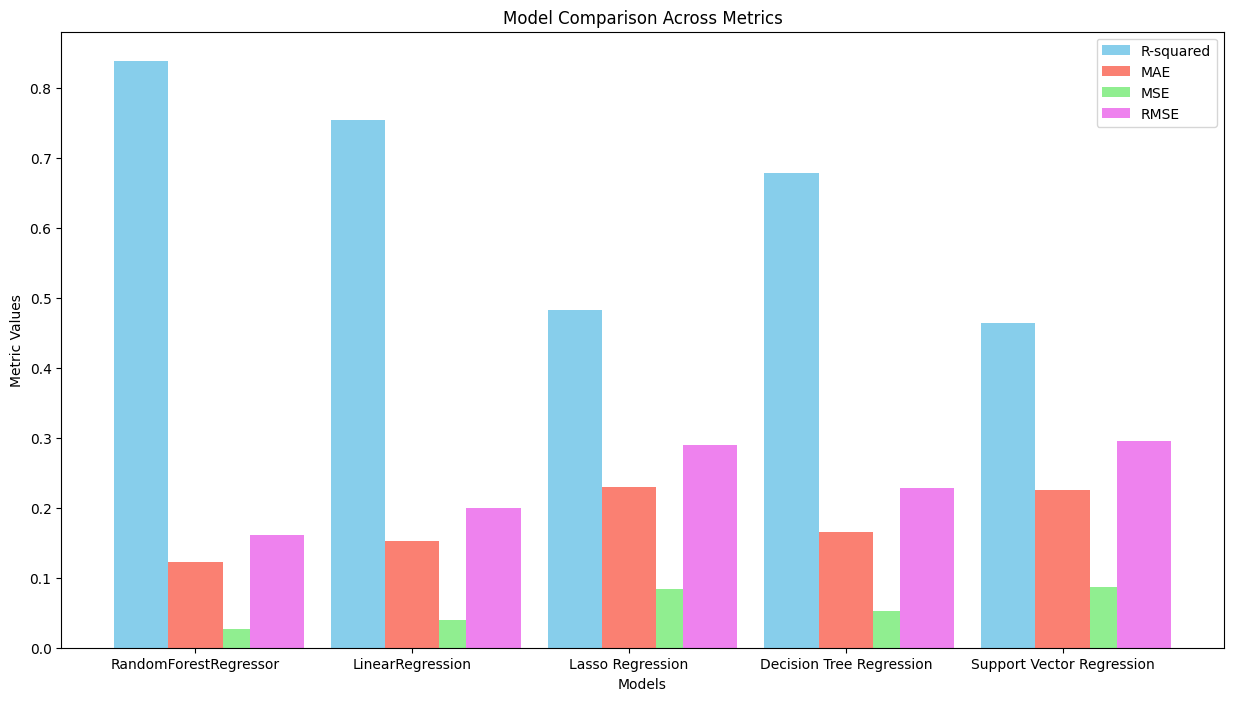

In [77]:
import numpy as np
# Set up positions for bars on X-axis
bar_width = 0.25
index = np.arange(len(model_names))

# Grouped bar chart for R-squared, MAE, and MSE
plt.figure(figsize=(15, 8))

plt.bar(index, r2_scores, width=bar_width, label='R-squared', color='skyblue')
plt.bar(index + bar_width, mae_values, width=bar_width, label='MAE', color='salmon')
plt.bar(index + 2 * bar_width, mse_values, width=bar_width, label='MSE', color='lightgreen')
plt.bar(index + 2.5 * bar_width, rmse_values, width=bar_width, label='RMSE', color='violet')

plt.xlabel('Models')
plt.ylabel('Metric Values')
plt.title('Model Comparison Across Metrics')
plt.xticks(index + bar_width, model_names)
plt.legend()

plt.show()


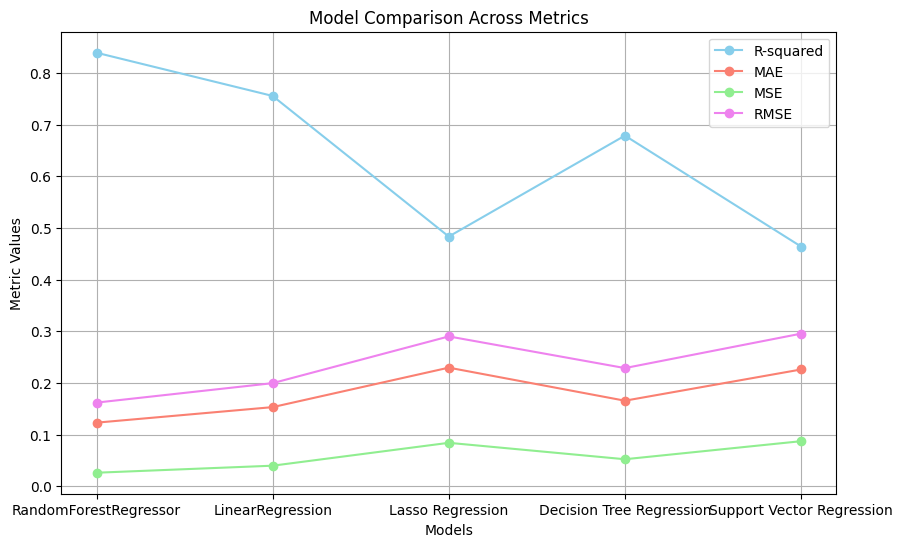

In [78]:
# Set up positions for points on X-axis
index = np.arange(len(model_names))

# Line plot with markers for R-squared
plt.figure(figsize=(10, 6))
plt.plot(index, r2_scores, marker='o', label='R-squared', color='skyblue')

# Line plot with markers for MAE
plt.plot(index, mae_values, marker='o', label='MAE', color='salmon')

# Line plot with markers for MSE
plt.plot(index, mse_values, marker='o', label='MSE', color='lightgreen')

# Line plot with markers for RMSE
plt.plot(index, rmse_values, marker='o', label='RMSE', color='violet')

plt.xlabel('Models')
plt.ylabel('Metric Values')
plt.title('Model Comparison Across Metrics')
plt.xticks(index, model_names)
plt.legend()
plt.grid(True)

plt.show()
